### Problem statement
The following assignment concerns the numpy.random package in Python. You are required to create a Jupyter notebook explaining the use of the package, including detailed explanations of at least five of the distributions provided for in the package.

There are four distinct tasks to be carried out in your Jupyter notebook.
1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

# Programming for Data Analysis - Assignment

## Generation of random numbers using the `numpy.random` package.

## Introduction

### Overall purpose of the package
Random numbers are used widely in several computational science areas, including in:
- statistical sampling: for example, in a quality control test, it is definitely more feasible to test a subset (randomly picked) rather than the entire lot of products.
- image analysis to ensure a particular algorithm is able to distinguish between features and noise
- cryptography so that a secret message, such as your credit card details, can be transmitted securely without anyone else being able to read it
- gaming and gambling:
- bioinformatics - cluster analysis, bootstrapping tests and stochastic simulations of biosystems (http://www0.cs.ucl.ac.uk/staff/d.jones/GoodPracticeRNG.pdf)
- [and more](https://en.wikipedia.org/wiki/Applications_of_randomness)

Notes: Equations are rendered here using [Tex](https://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Typesetting%20Equations.html#Motivating-Examples)

### How to generate random numbers? What is the difference between a true random number generator and a pseudo-random generator?

Now we know why random numbers are important in computational sciences, we need to know how to generate them. Note that there is a whole discipline devoted to the generation on random numbers (read more: https://www.random.org/randomness/ and Tuncer & Kaya (2018) https://www.hindawi.com/journals/cmmm/2018/3579275/).

There are two types of random number generators:

1. true random number generator - these are specialized devices that generate random numbers from microscopic physical processes. In principle, these can be any physical process including mouse-click events of computer users, bioelectric signals such as [electrocardiogram](https://ieeexplore.ieee.org/document/6513218), [atmospheric noise](random.org), thermal noise and the [photoelectric effect](https://en.wikipedia.org/wiki/Photoelectric_effect), so long these phenomena result in low-level, statistically-random signals.

    While the true generators are non-deterministic, they suffer from poor efficiency and require sophisticated and expensive hardware. In addition, there are many instances where the complexity and expense of true generators are not justified. For example, applications with legal ramifications such as gambling and random drug testing need to be truly random (otherwise, the gambling company may be sued!) whereas simulations in recreational computer games need a large number of random numbers generated in a quick succession not achievable by true generators. In the latter situations, pseudo-random generators come very handy.

1. pseudo-random number generator - Although Nature is a good source of random numbers, computers need to be programmed (in a deterministic manner, based on _a priori_ knowledge) to generate random numbers. To achieve this, either an algorithm (a mathematical equation) or a probability density function (a statistical method) can be used.

    **Computational method**
    One of the most common equation used is the [linear congruential generator](http://demonstrations.wolfram.com/LinearCongruentialGenerators/), defined by [a recurrence relation](https://en.wikipedia.org/wiki/Linear_congruential_generator):

    <center><i>X</i><sub>n+1</sub> = (<i>aX</i><sub>n</sub> + <i>c</i>) mod <i>m</i></center>
    
    **Statistical method**
    By definition, the numbers generated by a pseudo-random number generator using a mathematical function results in a continuous uniform distribution defined as follows: $f(x) = \frac{1}{b-a}$. In other words, if we generate a set of random numbers, the frequency by which any given number occurs is (at least theoretically) a constant.

    This set of uniformly-distributed numbers can then be transformed into a different distribution mathematically, through the [inversion method](https://www.statsdirect.com/help/randomization/generate_random_numbers.htm) or the [acceptance-rejection method](https://www.eg.bucknell.edu/~xmeng/Course/CS6337/Note/master/node59.html). There are also more details on [Wikipedia](https://en.wikipedia.org/wiki/Pseudo-random_number_sampling). 


### Why use `numpy.random`?

Methods such as the linear congruential generator (described above) and (also linear recursion-based) Mersenne Twister (used by the Python `random()` function) can be easily cracked, resulting in the ability of someone with a malicious intent (a hacker) to predict the sequence of random numbers, so long as he/she has a sufficiently long subsequence of the outputs. In other words, linear recursion-based methods are significantly insecure. Read more: [link1](https://security.stackexchange.com/questions/4268/cracking-a-linear-congruential-generator), [link2](http://www.math.sci.hiroshima-u.ac.jp/~m-mat/MT/efaq.html) and [link3](https://www.bishopfox.com/blog/2014/08/untwisting-mersenne-twister-killed-prng/)

Where security matters, a subtype of pseudo-random number generators, called [cryptographically-secure pseudo-random number generator (CPRNG)](https://en.wikipedia.org/wiki/Cryptographically_secure_pseudorandom_number_generator) must be used. Consequently, the [Python documentation for the `random()` function](https://docs.python.org/3.7/library/random.html) explicitly warns against its use in cryptography and recommends instead the use of the [`secrets` module](https://docs.python.org/3.7/library/secrets.html#module-secrets). Similarly, the [`numpy.random` package also uses Mersenne Twister](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.RandomState.html).

So [why use this package if they are the same](https://stackoverflow.com/questions/7029993/differences-between-numpy-random-and-random-random-in-python)? Firstly, not all situations called for the use of CPRNG. In addition, the package is also Numpy-aware, meaning arrays of numbers can be handled more efficiently than the standard Python `random()` function, leading to a more practicable use in statistics and data analytics.

## Understanding the `numpy.random` visually

In this notebook, we will look at the following functions:
1. the “Simple random data” and “Permutations” functions.
1. the use and purpose of at least five “Distributions” functions.
1. the use of seeds in generating pseudorandom numbers.

However, we should first look at `numpy` arrays. Before doing that, let's import some Python libraries:

In [5]:
import numpy as np # we are using the numpy.random package for this notebook
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### Dimensionality of arrays

This graphics below is an excellent way to visualize simple and multidimensional arrays.

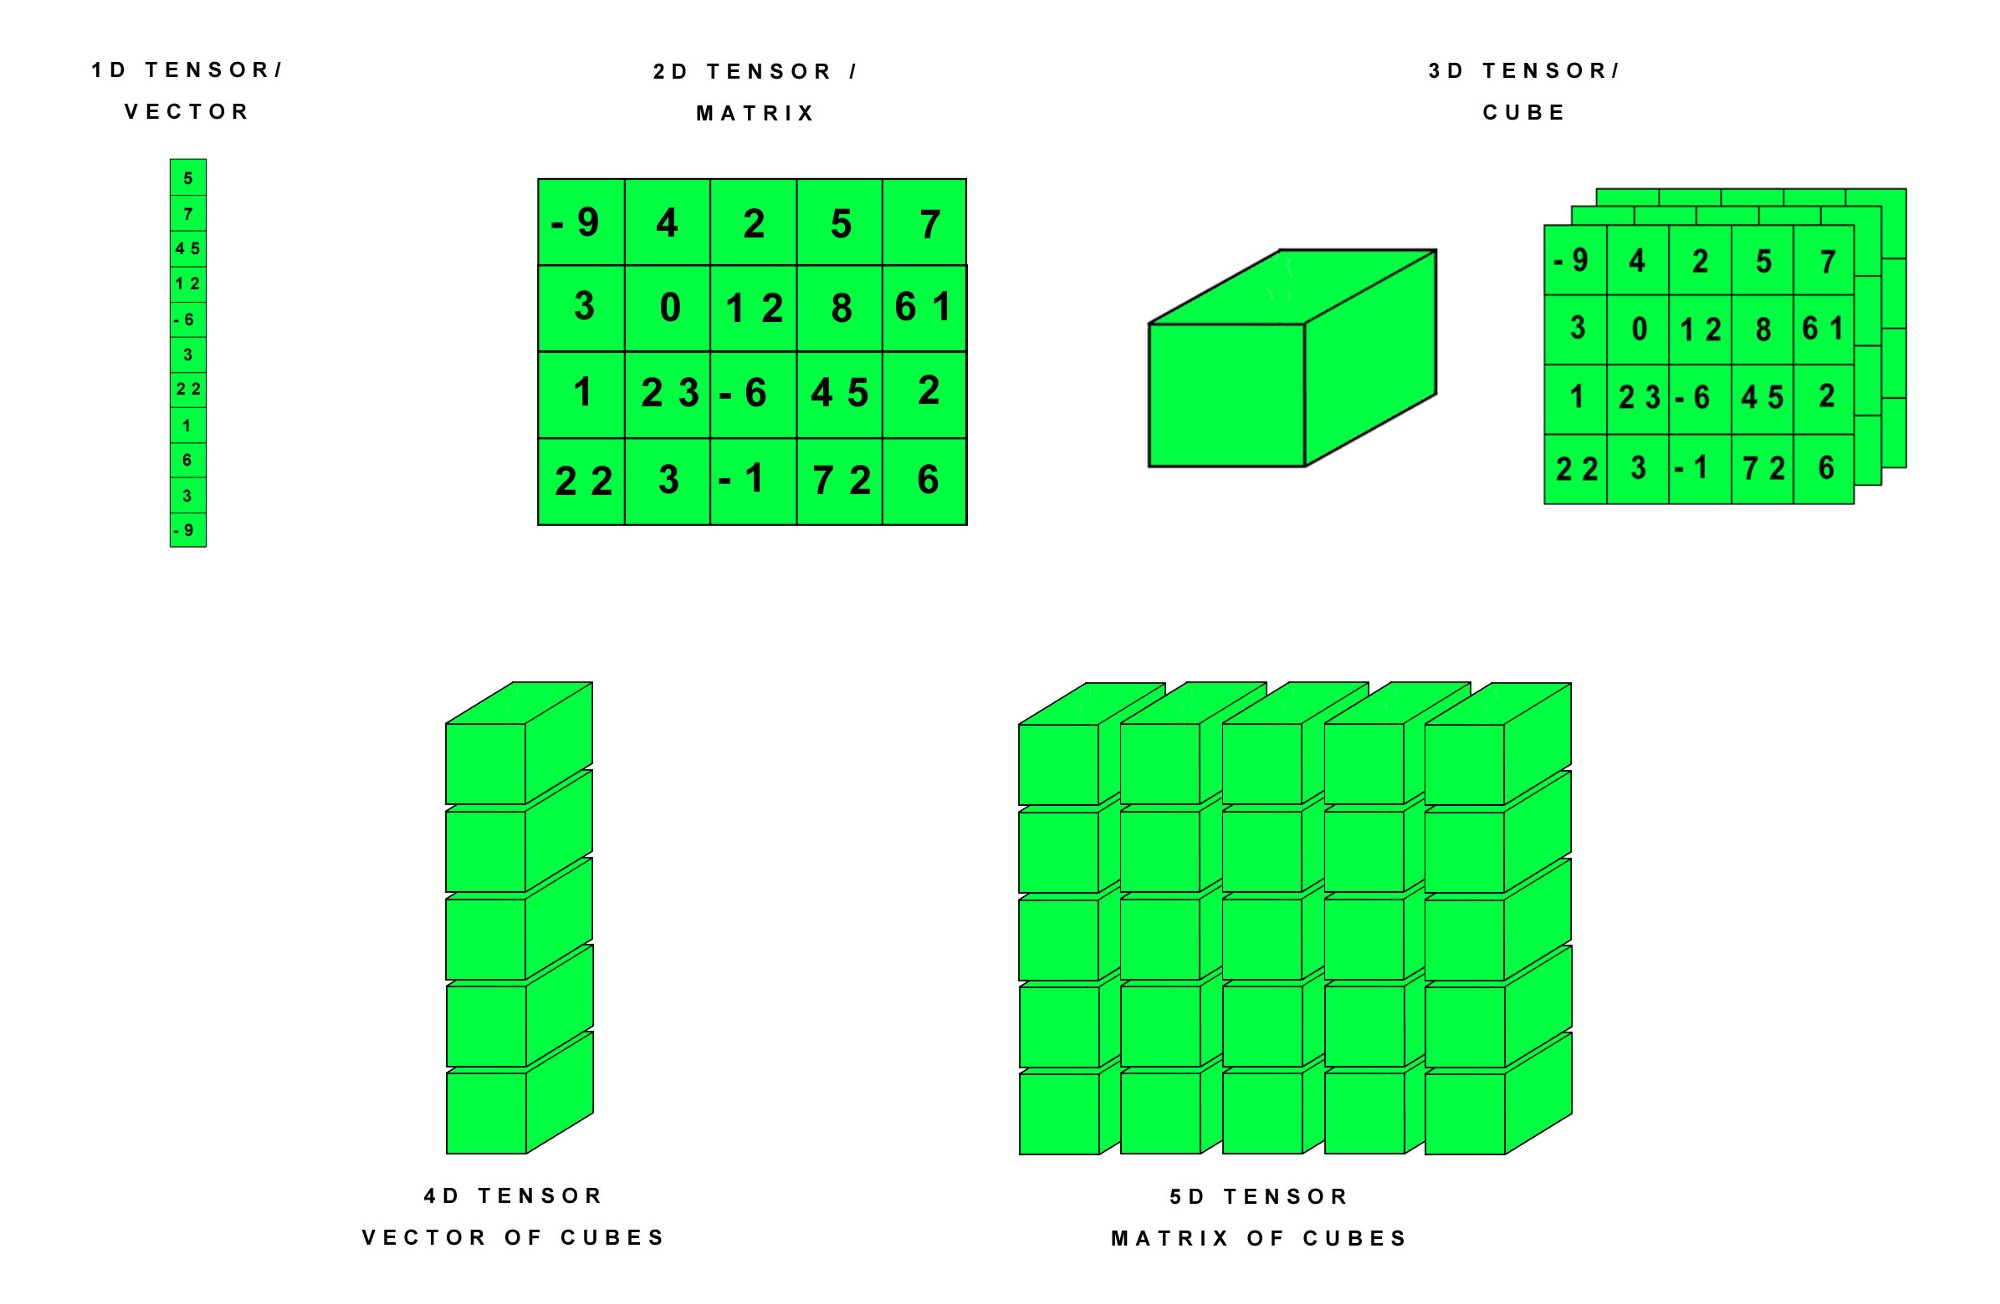

<div style='text-align:right'><i>Taken from <a href='https://hackernoon.com/learning-ai-if-you-suck-at-math-p4-tensors-illustrated-with-cats-27f0002c9b32'>Hacker Noon</i></div><br>

At the very basic level, a 1D array is simply a collection of numbers in a column (or a row). By adding another dimension, *i.e.* a row, we now have a collection of numbers arranged in a column AND a row (think of it as a rectangle). This 2D array is a matrix.

This rectangle can be converted into a cube in the third dimension - the best analogy for this is a collection of rectangles arranged like sheets in a book.

We can also stack a few books together on a bookshelf to create a fourth dimension (4D array). As you will see in a library, our books will be arranged on multiple bookshelves (fifth dimension - 5D array).

This visualization technique allows us to construct even more complex arrays. Actually, if you notice carefully, the output of the `rand()` function is already formatted with a white space between two matrices.

#### 1D array of a single row containing three numbers

In [6]:
example_1D_array = np.random.rand(3)
example_1D_array

array([0.10265335, 0.91562816, 0.84124924])

#### 2D array of 2 rows and 3 columns

In [7]:
example_2D_array = np.random.rand(2,3)
example_2D_array

array([[0.76826557, 0.93025466, 0.43095189],
       [0.37330467, 0.46882296, 0.05856994]])

#### 3D array of 2 rows and 3 columns arranged as 4 sheets, making up a cube

Note that the sheets are separated by horizontal white spaces - see the example for 4D array below with an annotated image

In [8]:
example_3D_array = np.random.rand(4,2,3)
example_3D_array

array([[[0.79588944, 0.33768576, 0.63257198],
        [0.04019843, 0.67826392, 0.73871963]],

       [[0.35453973, 0.30116346, 0.97076398],
        [0.0532986 , 0.6399207 , 0.6491509 ]],

       [[0.42558377, 0.23203855, 0.46835617],
        [0.54968945, 0.43947638, 0.39846021]],

       [[0.18258923, 0.27651678, 0.12623466],
        [0.88945227, 0.42424886, 0.68300572]]])

#### 4D array of 4 books each consisting of 5 sheets of 2 rows and 3 columns

In [9]:
example_4D_array = np.random.rand(4,5,2,3)
example_4D_array

array([[[[0.88011865, 0.1954784 , 0.9708055 ],
         [0.2212483 , 0.52704319, 0.31545241]],

        [[0.39515028, 0.07841288, 0.09734868],
         [0.0097266 , 0.07216572, 0.69640158]],

        [[0.74001688, 0.03915551, 0.32772141],
         [0.2979639 , 0.90272728, 0.5245188 ]],

        [[0.06055401, 0.95909502, 0.44288608],
         [0.61584916, 0.14217851, 0.82390502]],

        [[0.18650743, 0.95997657, 0.47334178],
         [0.29566976, 0.19554112, 0.0255343 ]]],


       [[[0.35836565, 0.69860379, 0.22904529],
         [0.60736937, 0.79874394, 0.59520641]],

        [[0.09954376, 0.90398553, 0.23507165],
         [0.6327976 , 0.21583339, 0.70707453]],

        [[0.70918174, 0.72514754, 0.9307498 ],
         [0.64700347, 0.1238697 , 0.58126263]],

        [[0.67911186, 0.52685865, 0.58195788],
         [0.68898876, 0.27113972, 0.75198995]],

        [[0.46408194, 0.4608723 , 0.77298445],
         [0.48562856, 0.53470686, 0.16628402]]],


       [[[0.9016042 , 0.19536984, 0.

The array above can be visualized as follows:

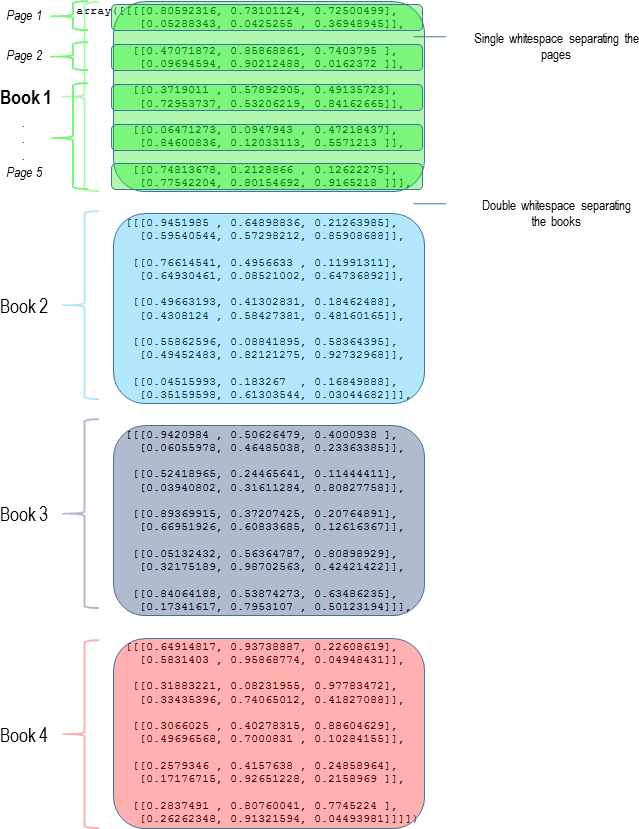

## Simple random data and Permutations functions

The corresponding documentations are here: https://docs.scipy.org/doc/numpy/reference/routines.random.html

| Function | Official documentation | Own interpretation |
| -------- | ---------------------- | ------------------ |
| rand(d0, d1, …, dn) | Random values in a given shape | The values are taken from a uniform distribution over [0, 1) |
| randn(d0, d1, …, dn) | Return a sample (or samples) from the “standard normal” distribution | Similar to the `rand()` function but from a normal distribution |
| randint(low[, high, size, dtype])	| Return random integers from low (inclusive) to high (exclusive) | Similar to the `rand()` function but from a discrete uniform distribution, because this will return only integers (discrete data) |
| random_integers(low[, high, size]) | Random integers of type np.int between low and high, inclusive | This function is almost the same as `randint()` except that both limits are inclusive (closed interval) |
| random_sample([size]) | Return random floats in the half-open interval [0.0, 1.0). | xxxxx |
| random([size]) | Return random floats in the half-open interval [0.0, 1.0). | Same as `random_sample()` |
| ranf([size]) | Return random floats in the half-open interval [0.0, 1.0). | Same as `random_sample()` |
| sample([size]) | Return random floats in the half-open interval [0.0, 1.0). | Same as `random_sample()` |
| choice(a[, size, replace, p]) | Generates a random sample from a given 1-D array | xxxx |
| bytes(length) | Return random bytes | xxx |



According to the source code for [`numpy.random`](https://github.com/numpy/numpy/blob/master/numpy/random/__init__.py):

<blockquote>
# Some aliases:<br>
ranf = random = sample = random_sample<br>
__all__.extend(['ranf', 'random', 'sample'])
</blockquote>

In order to visualize the outputs of the different functions, the code below will create a few variables that can then be examined by plotting the values.

In [13]:
output_function_rand = np.random.rand(1000) # this will return an array containing 1000 random numbers
output_function_randn = np.random.randn(1000) # same as above

# returns 1000 random integers between 10 (inclusive) and 20,000 (exclusive)
output_function_randint = np.random.randint(10, 20000, 1000)

# returns 1000 random integers between 10 (inclusive) and 20,000 (inclusive)
output_function_random_integers = np.random.random_integers(10,20000,1000)



#data = [go.Histogram(x=random_array,)]
#iplot(data)

In [16]:
np.random.random_sample(10)

array([0.6145736 , 0.07420377, 0.64239466, 0.00573849, 0.69052771,
       0.15574128, 0.64957752, 0.89440137, 0.1251256 , 0.43460578])

In [17]:
np.random.rand(10)

array([0.79432243, 0.82011815, 0.8016257 , 0.7547518 , 0.67155496,
       0.30440476, 0.4671517 , 0.68808807, 0.54081627, 0.75920878])

In [18]:
np.random.rand

<function RandomState.rand>

In [20]:
np.random.random_sample is np.random.rand

False

In [13]:
# returns an array of 3 rows x 2 cols, each with a floating point number between 0 and 1
array_3by2 = np.random.rand(3,2)

# maybe create some plots to show rand(3,2) is really just a 2D array and rand(3,2,2) is a 3D array
# and we can plot these accordingly

array_3by2

array([[0.91561533, 0.56829976],
       [0.31383036, 0.82336308],
       [0.06183798, 0.55097365]])

In [20]:
data2 = np.random.rand(3,2,2)
data2

array([[[0.49671743, 0.07392772],
        [0.36575407, 0.58200135]],

       [[0.98269468, 0.75319472],
        [0.89491128, 0.20758665]],

       [[0.25147157, 0.44595063],
        [0.14626355, 0.15815539]]])

In [23]:
data2[1][1]

array([0.89491128, 0.20758665])

In [10]:
data = [go.Histogram(x=array_3by2[1], y = array_3by2[2])]
iplot(data)

In [22]:
data = [go.Scatter(x=data2[1], y = data2[2])]
iplot(data)

In [5]:
np.random.rand(3,2,2)  # we can add another dimension as well - 3 arrays each of 2 x 2

array([[[0.41166319, 0.61397549],
        [0.48990461, 0.14377117]],

       [[0.84386764, 0.39888092],
        [0.26416621, 0.53473296]],

       [[0.62056183, 0.04924649],
        [0.29767307, 0.66288262]]])

In [6]:
np.random.rand(3,2,2,2)

array([[[[0.15457874, 0.13340979],
         [0.81624826, 0.14938436]],

        [[0.11520452, 0.157175  ],
         [0.51661747, 0.50613321]]],


       [[[0.88894055, 0.42124499],
         [0.6768277 , 0.94853537]],

        [[0.94356341, 0.29866639],
         [0.62867507, 0.43982924]]],


       [[[0.10737815, 0.81952832],
         [0.80685893, 0.22575555]],

        [[0.27481308, 0.23408426],
         [0.63126994, 0.22491124]]]])

In [16]:
random_array = np.random.rand(1000)

(array([102.,  89.,  85., 104., 100.,  97.,  95., 107., 108., 113.]),
 array([3.69705238e-04, 1.00327021e-01, 2.00284337e-01, 3.00241653e-01,
        4.00198968e-01, 5.00156284e-01, 6.00113600e-01, 7.00070916e-01,
        8.00028232e-01, 8.99985548e-01, 9.99942863e-01]),
 <a list of 10 Patch objects>)

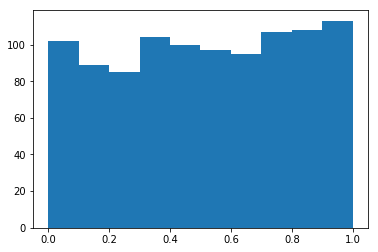

In [5]:
plt.hist(random_array)

In [14]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [15]:
data = [go.Histogram(x=random_array,)]
iplot(data)

In [20]:
random_array_2D = np.random.rand(1000,3)
data_2D = [go.Histogram2d(x=random_array_2D[1],y=random_array_2D[2])]
iplot(data_2D)

In [21]:
data_2D = [go.Histogram2dContour(x=random_array_2D[1],y=random_array_2D[2])]
iplot(data_2D)